In [1]:
!pip install seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Cargar el dataset
file_path = "Mobiles Dataset.csv"
df = pd.read_csv(file_path, encoding='latin1')

In [4]:
# Convertir columnas numéricas a formato adecuado, eliminando caracteres no numéricos

# Asegurarse de que las columnas son del tipo string antes de aplicar str.replace()
df['Battery Capacity'] = df['Battery Capacity'].astype(str).str.replace(",", "").str.replace("mAh", "", regex=False).astype(float)
df['Mobile Weight'] = df['Mobile Weight'].astype(str).str.replace(",", "").str.replace("g", "", regex=False).astype(float)

# Para 'Screen Size', extraer solo el primer número y convertirlo a float
# Utilizamos str.extract para obtener el primer número de la cadena (antes de cualquier texto adicional)
df['Screen Size'] = df['Screen Size'].astype(str).str.extract(r'(\d+(\.\d+)?)')[0].astype(float)

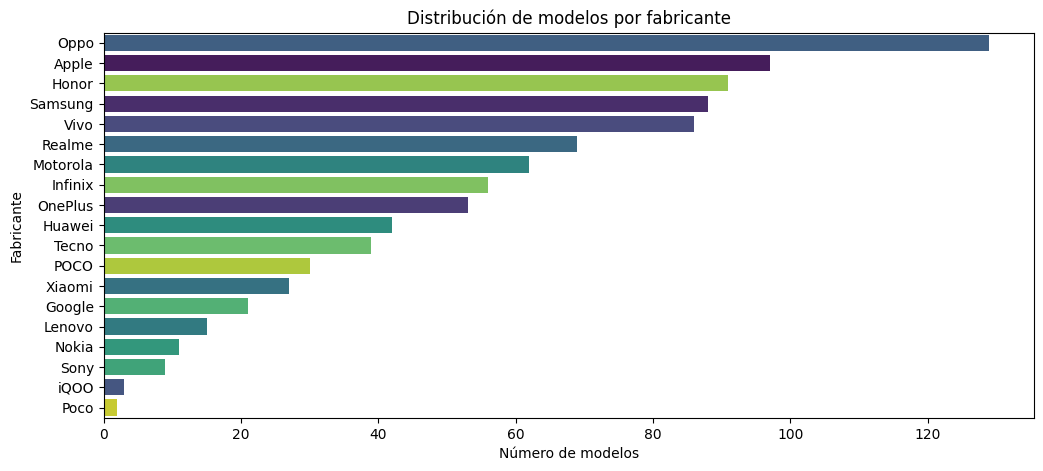

In [5]:
plt.figure(figsize=(12, 5))
sns.countplot(y='Company Name', data=df, order=df['Company Name'].value_counts().index, palette='viridis', hue='Company Name')
plt.title("Distribución de modelos por fabricante")
plt.xlabel("Número de modelos")
plt.ylabel("Fabricante")
plt.show()

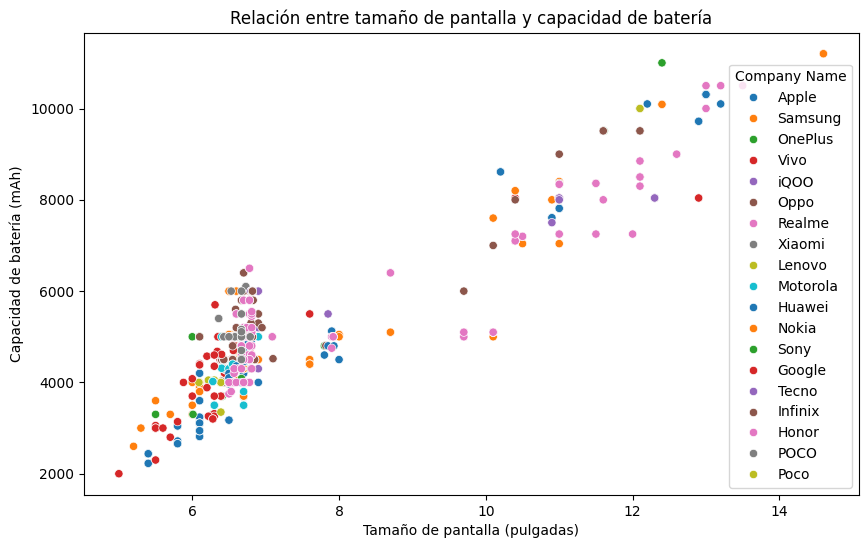

In [6]:
# Relación entre tamaño de pantalla y capacidad de batería
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Screen Size'], y=df['Battery Capacity'], hue=df['Company Name'], palette='tab10')
plt.title("Relación entre tamaño de pantalla y capacidad de batería")
plt.xlabel("Tamaño de pantalla (pulgadas)")
plt.ylabel("Capacidad de batería (mAh)")
plt.show()

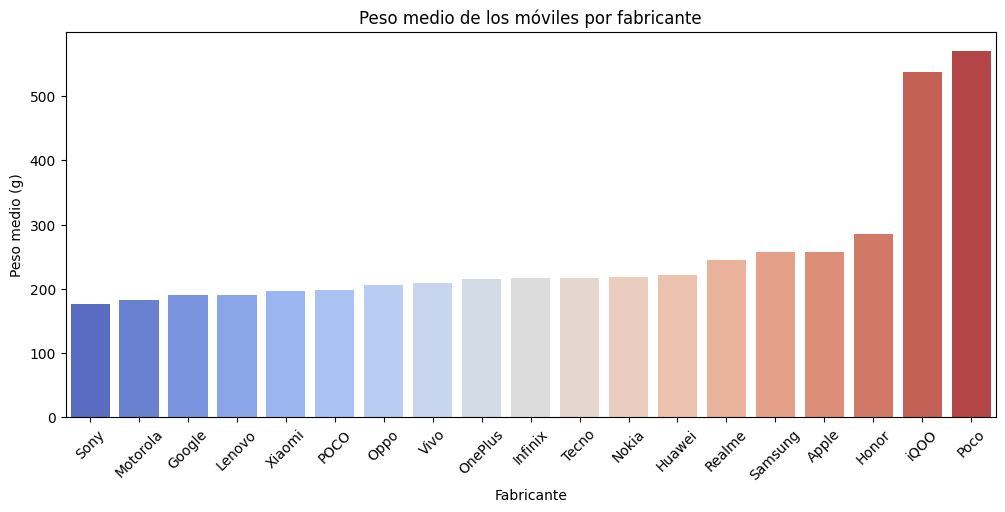

In [7]:
# Comparación del peso medio por fabricante
df_weight = df.groupby('Company Name')['Mobile Weight'].mean().sort_values()

plt.figure(figsize=(12, 5))
sns.barplot(x=df_weight.index, y=df_weight.values, palette='coolwarm', hue=df_weight.index)
plt.xticks(rotation=45)
plt.title("Peso medio de los móviles por fabricante")
plt.xlabel("Fabricante")
plt.ylabel("Peso medio (g)")
plt.show()

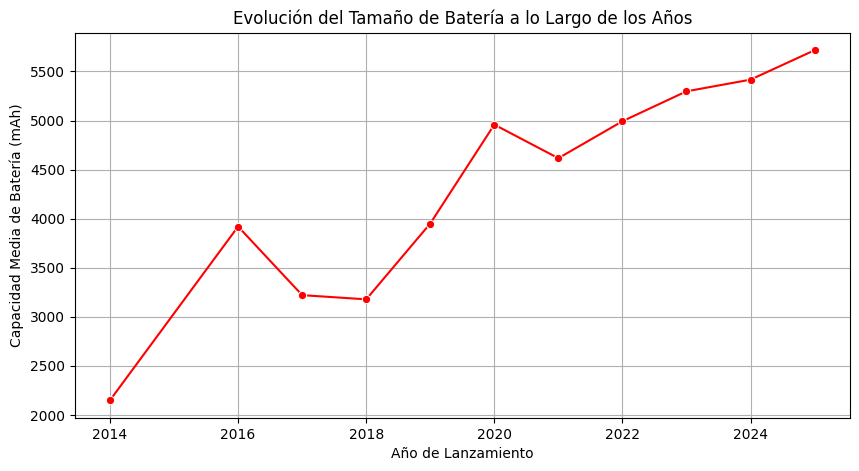

In [8]:
df_year_battery = df.groupby('Launched Year')['Battery Capacity'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=df_year_battery.index, y=df_year_battery.values, marker="o", color='red')
plt.title("Evolución del Tamaño de Batería a lo Largo de los Años")
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Capacidad Media de Batería (mAh)")
plt.grid(True)
plt.show()

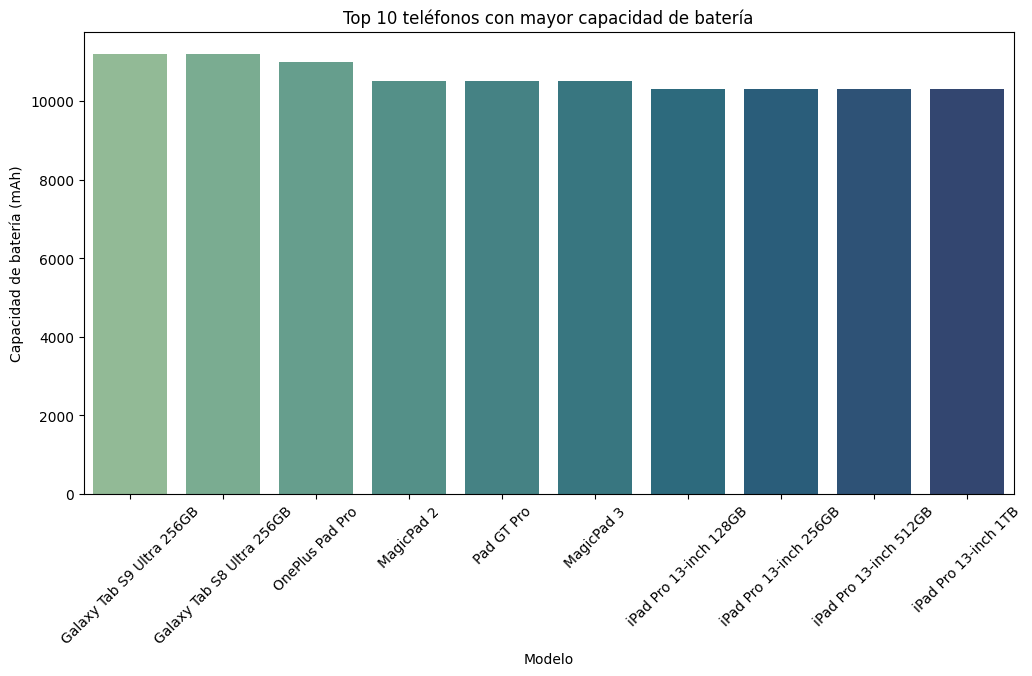

In [9]:
df_top_battery = df.nlargest(10, 'Battery Capacity')

# Ahora el gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x='Model Name', y='Battery Capacity', data=df_top_battery, palette='crest', hue='Model Name')
plt.xticks(rotation=45)
plt.title("Top 10 teléfonos con mayor capacidad de batería")
plt.xlabel("Modelo")
plt.ylabel("Capacidad de batería (mAh)")
plt.show()

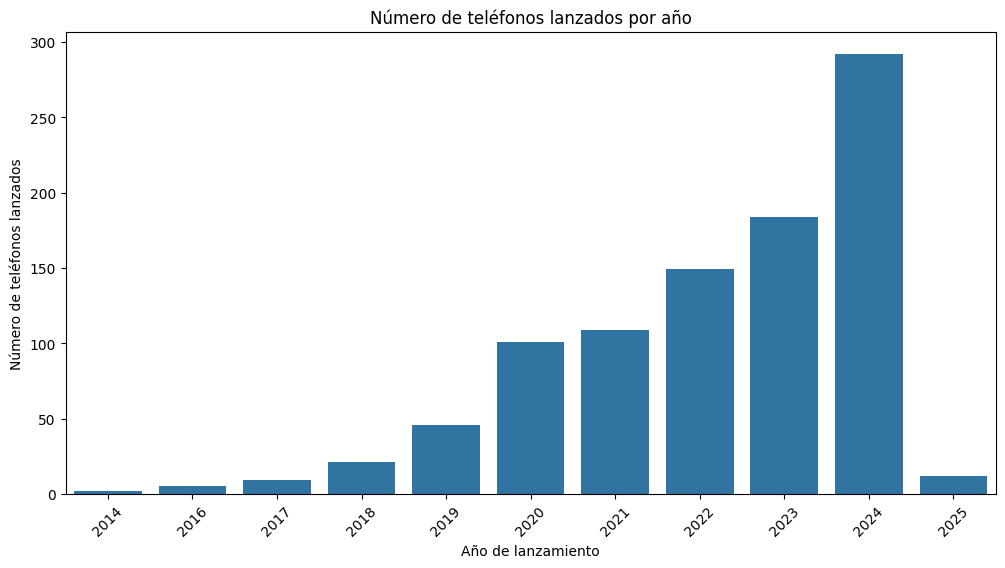

In [10]:
df_year_count = df.groupby('Launched Year').size()

# Paso 2: Crear el gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x=df_year_count.index, y=df_year_count.values)
plt.title("Número de teléfonos lanzados por año")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Número de teléfonos lanzados")
plt.xticks(rotation=45)
plt.show()

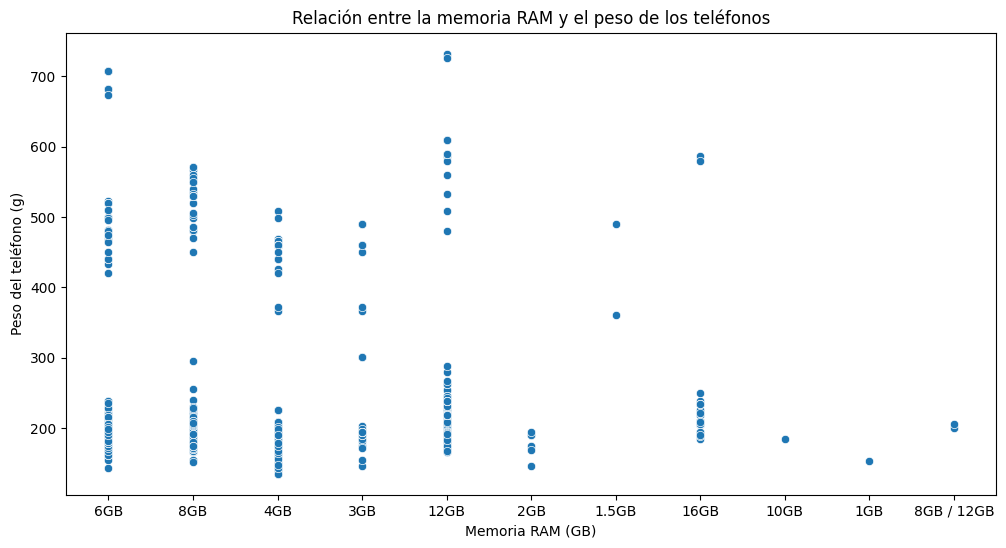

In [13]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='RAM', y='Mobile Weight', data=df)
plt.title("Relación entre la memoria RAM y el peso de los teléfonos")
plt.xlabel("Memoria RAM (GB)")
plt.ylabel("Peso del teléfono (g)")
plt.show()